# Imports

In [1]:
import os

import matplotlib.pyplot as plt
import structlog
import numpy as np

logger = structlog.get_logger(__name__)

# Plot model structure

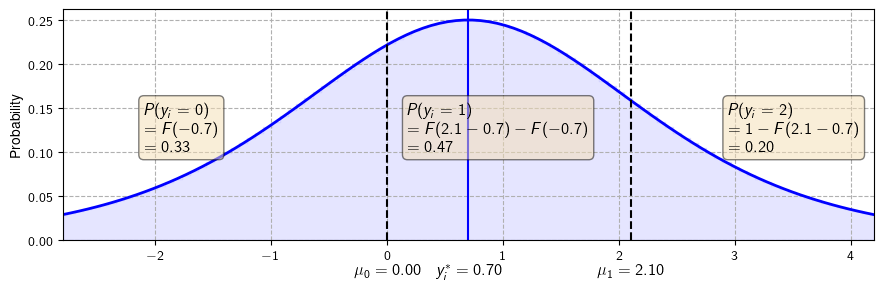

In [ ]:
from typing import Optional
import scipy
from tools.plotter import activate_latex, deactivate_latex
from tools.utils import ensure_dir


def plot_ordered_logit(savename: Optional[str] = None):
    # set values
    UTILITY = 0.70
    LINSPACE_EDGE = 3.5
    THRESHOLDS = [0.0, 2.10]

    # plot pdf
    _, ax = plt.subplots(1, 1, figsize=(9, 3))  # (7,3)
    linspace = np.linspace(UTILITY - LINSPACE_EDGE, UTILITY + LINSPACE_EDGE, 100)
    logistic_pdf = scipy.stats.logistic(UTILITY, 1).pdf(linspace)
    ax.plot(linspace, logistic_pdf, linewidth=2, color="blue")
    ax.fill_between(
        linspace, logistic_pdf, np.zeros(len(linspace)), color="blue", alpha=0.1, step="mid"
    )
    ax.axvline(UTILITY, color="blue", linestyle="-")
    ax.text(UTILITY, -0.04, f"$y_i^* = {UTILITY:.2f}$", ha="center", fontsize=12)
    # plot thresholds
    for i, threshold in enumerate(THRESHOLDS):
        ax.axvline(threshold, color="k", linestyle="--")
        ax.text(
            threshold, -0.04, f"$\mu_{i} = {threshold:.2f}$", ha="center", fontsize=12
        )
    ax.set_ylabel("Probability")
    ax.grid(True, linestyle="--")
    ax.set_ylim(ymin=0.0)
    ax.set_xlim(
        xmin=UTILITY - LINSPACE_EDGE, xmax=UTILITY + LINSPACE_EDGE
    )


    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
    textstr_y0 = "\n".join(
        (
            r"$P(y_i = 0)$",
            r"$= F(-0.7)$",
            r"$=0.33$",
        )
    )
    textstr_y1 = "\n".join(
        (
            r"$P(y_i = 1)$",
            r"$= F(2.1-0.7) - F(-0.7)$",
            r"$=0.47$",
        )
    )
    textstr_y2 = "\n".join(
        (
            r"$P(y_i = 2)$",
            r"$= 1 - F(2.1-0.7)$",
            r"$=0.20$",
        )
    )
    # place a text box in upper left in axes coords
    ax.text(
        0.10,
        0.60,
        textstr_y0,
        transform=ax.transAxes,
        fontsize=12,
        verticalalignment="top",
        bbox=props,
    )
    ax.text(
        0.425,
        0.60,
        textstr_y1,
        transform=ax.transAxes,
        fontsize=12,
        verticalalignment="top",
        bbox=props,
    )
    ax.text(
        0.82,
        0.60,
        textstr_y2,
        transform=ax.transAxes,
        fontsize=12,
        verticalalignment="top",
        bbox=props,
    )

    if savename is not None:
        plt.tight_layout()
        ensure_dir(os.path.dirname(savename))
        plt.savefig(savename)
    plt.show()


activate_latex(sans_serif=True)
# savename=None
# savename = os.path.join("output", "figures", "ordered_logit_example.pdf")
# plot_ordered_logit(savename=savename)
deactivate_latex()

In [3]:
print(scipy.stats.logistic().cdf(-0.70))
print(scipy.stats.logistic().cdf(2.10-0.70)-scipy.stats.logistic().cdf(-0.70))
print(1-scipy.stats.logistic().cdf(2.10-0.70))


0.3318122278318339
0.4703716607267479
0.1978161114414182


In [4]:
print(scipy.stats.logistic(0.70,1).cdf(0))
print(scipy.stats.logistic(0.70,1).cdf(2.10)-scipy.stats.logistic(0.70,1).cdf(0.0))
print(1-scipy.stats.logistic(0.70,1).cdf(2.10))

0.3318122278318339
0.4703716607267479
0.1978161114414182
